In [2]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b3/70/56da2b82f848baf34bfd8c35e606ce45049b371ffaaaa7f0427093d29950/pandas-2.1.4-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------------ ------- 276.5/341.8 kB 8.6 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 16.8 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/10.7 MB 13.7 MB/s eta 0:00:01
   ------ --------------------------------- 1


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import pandas as pd

def read_images_and_labels(folder_path):
    data = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            file_path = os.path.join(label_path, filename)
            data.append({'file_path': file_path, 'label': label})
    return data

# Assuming you have folders 'train', 'test', and 'valid' with labeled subfolders
train_data = read_images_and_labels('trained')
test_data = read_images_and_labels('test')
valid_data = read_images_and_labels('valid')

# Create DataFrames
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
valid_df = pd.DataFrame(valid_data)

# Shuffle the DataFrames
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)
valid_df = valid_df.sample(frac=1).reset_index(drop=True)

# Save to CSV
train_df.to_csv('trained.csv', index=False)
test_df.to_csv('test.csv', index=False)
valid_df.to_csv('valid.csv', index=False)


In [5]:
train_df.head()


,file_path,label
0,trained\Apple___healthy\5fd95287-1688-4342-810...,Apple___healthy
1,trained\Orange___Haunglongbing_(Citrus_greenin...,Orange___Haunglongbing_(Citrus_greening)
2,trained\Tomato___Bacterial_spot\07957e12-d57c-...,Tomato___Bacterial_spot
3,trained\Peach___Bacterial_spot\aed9b348-a582-4...,Peach___Bacterial_spot
4,trained\Tomato___Target_Spot\59caebd8-c258-45a...,Tomato___Target_Spot


In [6]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 4.3 MB/s eta 0:00:09
    --------------------------------------- 0.6/38.1 MB 7.9 MB/s eta 0:00:05
   - -------------------------------------- 1.5/38.1 MB 11.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/38.1 MB 12.8 MB/s eta 0:00:03
   --- ------------------------------------ 3.1/38.1 MB 14.0 MB/s eta 0:00:03
   ---- ----------------------------------- 4.0/38.1 MB 15.1 MB/s eta 0:00:03
   ----- ---------------------------------- 4.8/38.1 MB 16.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.4/38.1 MB 15.0 MB/s eta 0:00:03
   ------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


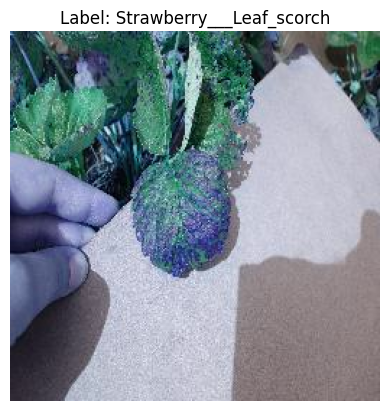

In [8]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import random

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Select a random row from the DataFrame
random_index = random.randint(0, len(df) - 1)
sample_row = df.iloc[random_index]

# Extract the file path and label
file_path = sample_row['file_path']
label = sample_row['label']

# Read the image
image = cv2.imread(file_path)

# If the image has a single channel (grayscale), convert it to RGB
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


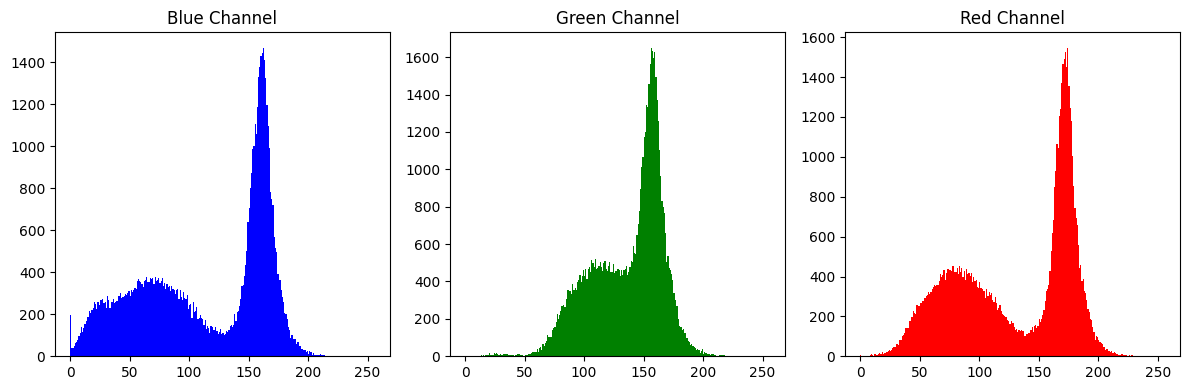

In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Select a random row from the DataFrame
random_index = random.randint(0, len(df) - 1)
sample_row = df.iloc[random_index]

# Extract the file path and label
file_path = sample_row['file_path']
label = sample_row['label']

# Read the image
image = cv2.imread(file_path)

# If the image has a single channel (grayscale), convert it to RGB
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Split the image into its channels
b, g, r = cv2.split(image)

# Plot the histograms for each channel
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(b.flatten(), bins=256, color='blue', range=[0,256])
plt.title('Blue Channel')

plt.subplot(132)
plt.hist(g.flatten(), bins=256, color='green', range=[0,256])
plt.title('Green Channel')

plt.subplot(133)
plt.hist(r.flatten(), bins=256, color='red', range=[0,256])
plt.title('Red Channel')

plt.tight_layout()
plt.show()


In [11]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.6 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


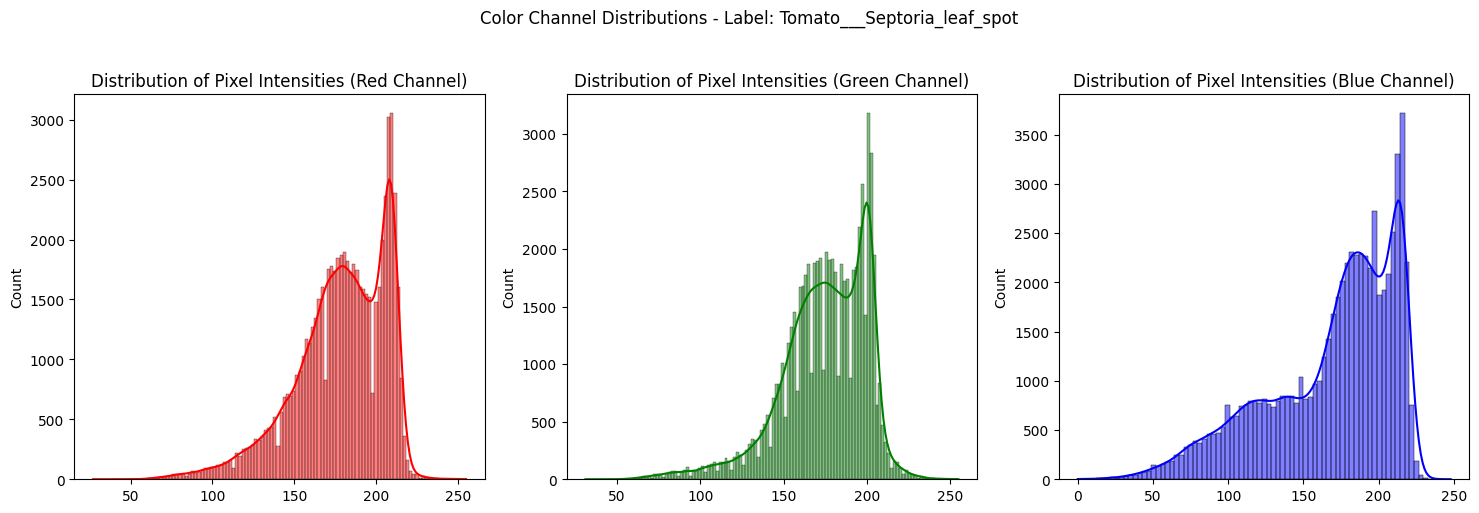

In [12]:
import pandas as pd
import cv2
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Select a random row from the DataFrame
random_index = random.randint(0, len(df) - 1)
sample_row = df.iloc[random_index]

# Extract the file path and label
file_path = sample_row['file_path']
label = sample_row['label']

# Read the image
image = cv2.imread(file_path)

# If the image has a single channel (grayscale), convert it to RGB
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Split the image into its channels
b, g, r = cv2.split(image)

# Create distplots for each color channel using seaborn
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.histplot(r.flatten(), kde=True, color='red')
plt.title('Distribution of Pixel Intensities (Red Channel)')

plt.subplot(132)
sns.histplot(g.flatten(), kde=True, color='green')
plt.title('Distribution of Pixel Intensities (Green Channel)')

plt.subplot(133)
sns.histplot(b.flatten(), kde=True, color='blue')
plt.title('Distribution of Pixel Intensities (Blue Channel)')

plt.suptitle(f'Color Channel Distributions - Label: {label}', y=1.05)
plt.show()




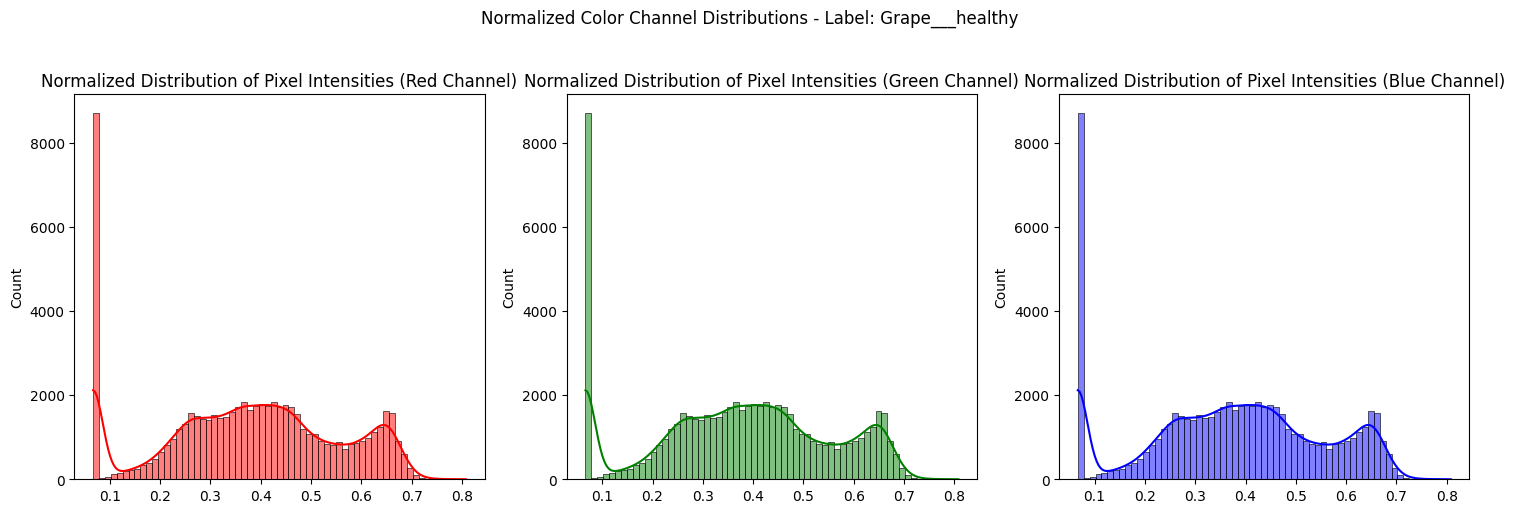

In [13]:
import pandas as pd
import cv2
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Select a random row from the DataFrame
random_index = random.randint(0, len(df) - 1)
sample_row = df.iloc[random_index]

# Extract the file path and label
file_path = sample_row['file_path']
label = sample_row['label']

# Read the image
image = cv2.imread(file_path)

# If the image has a single channel (grayscale), convert it to RGB
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Split the image into its channels
b, g, r = cv2.split(image)

# Normalize pixel intensities to the range [0, 1]
r_normalized = r / 255.0
g_normalized = g / 255.0
b_normalized = b / 255.0

# Create distplots for each color channel using seaborn
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.histplot(r_normalized.flatten(), kde=True, color='red')
plt.title('Normalized Distribution of Pixel Intensities (Red Channel)')

plt.subplot(132)
sns.histplot(g_normalized.flatten(), kde=True, color='green')
plt.title('Normalized Distribution of Pixel Intensities (Green Channel)')

plt.subplot(133)
sns.histplot(b_normalized.flatten(), kde=True, color='blue')
plt.title('Normalized Distribution of Pixel Intensities (Blue Channel)')

plt.suptitle(f'Normalized Color Channel Distributions - Label: {label}', y=1.05)
plt.show()


In [14]:
import pandas as pd

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Calculate the percentage for each class
total_samples = len(df)
class_percentages = class_counts / total_samples * 100

# Display the results
print("Class Distribution:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)


Class Distribution:
label
Apple___healthy                                       1000
Tomato___healthy                                      1000
Apple___Black_rot                                     1000
Corn_(maize)___Northern_Leaf_Blight                   1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1000
Tomato___Septoria_leaf_spot                           1000
Potato___Late_blight                                  1000
Pepper,_bell___Bacterial_spot                         1000
Apple___Cedar_apple_rust                              1000
Tomato___Spider_mites Two-spotted_spider_mite         1000
Orange___Haunglongbing_(Citrus_greening)              1000
Tomato___Tomato_mosaic_virus                          1000
Peach___healthy                                       1000
Pepper,_bell___healthy                                1000
Strawberry___Leaf_scorch                              1000
Soybean___healthy                                     1000
Strawberry___healthy          

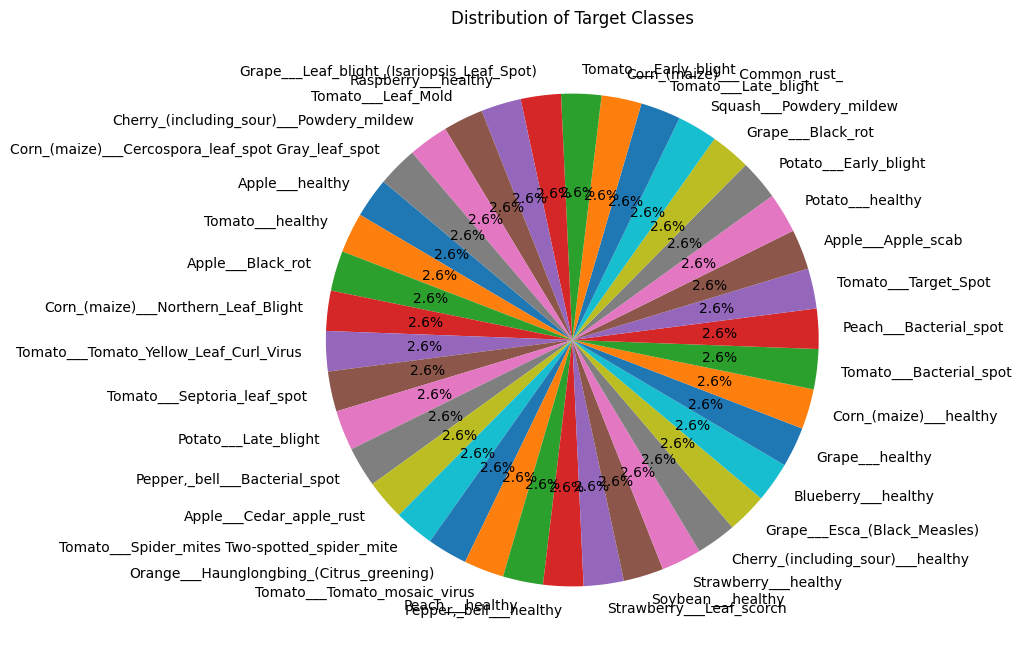

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = 'trained.csv'
df = pd.read_csv(csv_file_path)

# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes')
plt.show()
